# import

In [1]:
from Utilities.utils import *

# Get the current working directory
current_working_dir = os.path.join(Path(os.getcwd()).parent,'data') 
ED7_data_dict = load_h5(os.path.join(current_working_dir,r"ED7_data.h5"))

# figure A

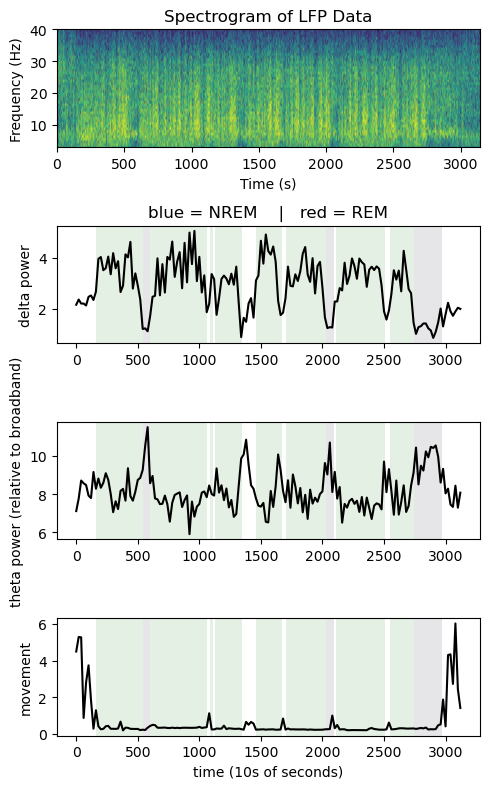

In [4]:
data= ED7_data_dict['spectrogram_data']

log_power = data["log_power"]
frequencies = data["frequencies"]
times = data["times"]
t_points_cut = data["t_points_cut"]
delta_cut = data["delta_cut"]
theta_r_cut = data["theta_r_cut"]
average_velocity_cut = data["average_velocity_cut"]
nrem_spans = data["nrem_spans"]
rem_spans = data["rem_spans"]
spectrogram_params = data["spectrogram_params"]
span_params = data["span_params"]

# Figure
fig, [ax, ax1, ax2, ax3] = plt.subplots(4, 1, figsize=(5, 8))

# --- Spectrogram ---
im = ax.imshow(
    log_power,
    aspect="auto",
    origin="lower",
    cmap=spectrogram_params["cmap"],
    extent=[
        0,
        times.max(),
        frequencies.min(),
        frequencies.max()
    ],
    vmin=spectrogram_params["vmin"],
    vmax=spectrogram_params["vmax"]
)

ax.set_ylabel("Frequency (Hz)")
ax.set_xlabel("Time (s)")
ax.set_title("Spectrogram of LFP Data")
ax.set_ylim(*spectrogram_params["freq_ylim"])

# --- Delta ---
ax1.plot(
    t_points_cut,
    delta_cut / np.std(delta_cut),
    c="k"
)
ax1.set_title("blue = NREM    |   red = REM")
ax1.set_ylabel("delta power")

# --- Theta ratio ---
ax2.plot(
    t_points_cut,
    theta_r_cut / np.std(theta_r_cut),
    c="k"
)
ax2.set_ylabel("theta power (relative to broadband)")

# --- Movement ---
ax3.plot(
    t_points_cut,
    average_velocity_cut / np.std(average_velocity_cut),
    c="k"
)
ax3.set_xlabel("time (10s of seconds)")
ax3.set_ylabel("movement")

# --- Sleep state shading ---
axs = [ax1, ax2, ax3]

shade_spans(
    axs,
    nrem_spans,
    color=span_params["nrem_color"],
    bin_width=span_params["bin_width"],
    alpha=span_params["alpha"]
)

shade_spans(
    axs,
    rem_spans,
    color=span_params["rem_color"],
    bin_width=span_params["bin_width"],
    alpha=span_params["alpha"]
)

plt.tight_layout()
plt.show()


# figure B

ShapiroResult(statistic=np.float64(0.9497536861314816), pvalue=np.float64(0.3370135366926875))
ShapiroResult(statistic=np.float64(0.641425331586676), pvalue=np.float64(5.574341509215321e-06))
WilcoxonResult(statistic=np.float64(14.0), pvalue=np.float64(0.0001049041748046875))


c:\Users\Emmett Thompson\Documents\procedural_replay_paper_2025\ED_7\Utilities\utils.py:889: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return {"test": "Wilcoxon signed-rank", "W": res['W-val'][0], "p": res['p-val'][0], "rank_biserial_r": res['RBC'][0]}


{'test': 'Wilcoxon signed-rank',
 'W': np.float64(14.0),
 'p': np.float64(0.0001049041748046875),
 'rank_biserial_r': np.float64(0.8787878787878789)}

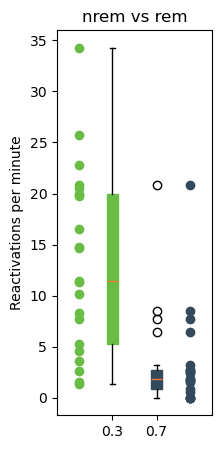

In [5]:
nrem_reactivations_per_min = ED7_data_dict['nrem_master']['reactivations_per_min']
rem_reactivations_per_min = ED7_data_dict['rem_master']['reactivations_per_min']

# replace nan values with 0
nrem_reactivations_per_min = [0 if np.isnan(item) else item for item in nrem_reactivations_per_min]
rem_reactivations_per_min = [0 if np.isnan(item) else item for item in rem_reactivations_per_min]

## PLOT
fig, ax = plt.subplots(figsize=(2, 5))
ax.plot(np.zeros(len(nrem_reactivations_per_min)), nrem_reactivations_per_min, 'o', color = '#69BD45')
ax.boxplot(nrem_reactivations_per_min, positions=[0.3], widths=0.1, patch_artist=True, boxprops=dict(facecolor='#69BD45', color='#69BD45'), medianprops=dict(color='#EE7832'))
ax.plot(np.ones(len(rem_reactivations_per_min)), rem_reactivations_per_min, 'o', color = '#33495C')
ax.boxplot(rem_reactivations_per_min, positions=[0.7], widths=0.1, patch_artist=True, boxprops=dict(facecolor='#33495C', color='#33495C'), medianprops=dict(color='#EE7832'))
ax.set_ylabel('Reactivations per minute')
ax.set_title('nrem vs rem')
## STATS
a = [x for x in nrem_reactivations_per_min if not np.isnan(x)]
b = [x for x in rem_reactivations_per_min if not np.isnan(x)]
print(scipy.stats.shapiro(a))
print(scipy.stats.shapiro(b))
# p is not greater than 0.05 for both, so we reject the null hypothesis that the data is normally distributed
# non parametric t test, using scipy Wilcoxon Rank-Sum test
print(scipy.stats.wilcoxon(a, b))
effect_size(x=a, y=b, test='wilcoxon')

# figure C

ShapiroResult(statistic=np.float64(0.8583337126686227), pvalue=np.float64(0.0059320884637456125))
ShapiroResult(statistic=np.float64(0.8873925358867135), pvalue=np.float64(0.028942337079135627))
WilcoxonResult(statistic=np.float64(13.0), pvalue=np.float64(0.000335693359375))
{'test': 'Wilcoxon signed-rank', 'W': np.float64(13.0), 'p': np.float64(0.000335693359375), 'rank_biserial_r': np.float64(-0.8631578947368421)}


C:\Users\Emmett Thompson\AppData\Local\Temp\ipykernel_44144\863144533.py:4: RuntimeWarning: Mean of empty slice
  rem_event_lens = [np.nanmean(item) for item in rem_event_lens]
c:\Users\Emmett Thompson\Documents\procedural_replay_paper_2025\ED_7\Utilities\utils.py:889: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return {"test": "Wilcoxon signed-rank", "W": res['W-val'][0], "p": res['p-val'][0], "rank_biserial_r": res['RBC'][0]}


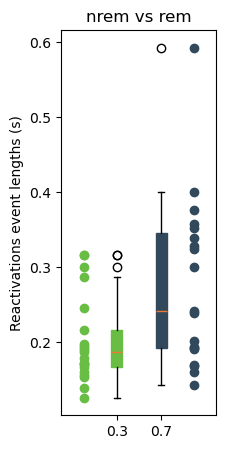

In [6]:
nrem_event_lens = ED7_data_dict['nrem_master']['event_lens']
rem_event_lens = ED7_data_dict['rem_master']['event_lens']
nrem_event_lens = [np.nanmean(item) for item in nrem_event_lens]
rem_event_lens = [np.nanmean(item) for item in rem_event_lens]

### PLOT
fig, ax = plt.subplots(figsize=(2, 5))
ax.plot(np.zeros(len(nrem_event_lens)), nrem_event_lens, 'o', color = '#69BD45')
ax.boxplot(nrem_event_lens, positions=[0.3], widths=0.1, patch_artist=True, boxprops=dict(facecolor='#69BD45', color='#69BD45'), medianprops=dict(color='#EE7832'))
ax.plot(np.ones(len(rem_event_lens)), rem_event_lens, 'o', color = '#32495C')
ax.boxplot([x for x in rem_event_lens if not np.isnan(x)], positions=[0.7], widths=0.1, patch_artist=True, boxprops=dict(facecolor='#32495C', color='#32495C'), medianprops=dict(color='#EE7832'))
ax.set_ylabel('Reactivations event lengths (s)')
ax.set_title('nrem vs rem')

### STATS
a = [x for x in nrem_event_lens if not np.isnan(x)]
b = [x for x in rem_event_lens if not np.isnan(x)]
print(scipy.stats.shapiro(a))
print(scipy.stats.shapiro(b))
# p is greater than 0.05 for both, so we fail to reject the null hypothesis that the data is normally distributed
print(scipy.stats.wilcoxon(nrem_event_lens, rem_event_lens,nan_policy='omit'))
print(effect_size(x=nrem_event_lens, y=rem_event_lens, test='wilcoxon'))


# figure D

C:\Users\Emmett Thompson\AppData\Local\Temp\ipykernel_31040\2482699526.py:5: RuntimeWarning: invalid value encountered in divide
  nrem_proportion_forward_v_reverse = np.array(nrem_forward_total)/np.array(nrem_reverse_total)
C:\Users\Emmett Thompson\AppData\Local\Temp\ipykernel_31040\2482699526.py:7: RuntimeWarning: invalid value encountered in divide
  rem_proportion_forward_v_reverse = np.array(rem_forward_total)/np.array(rem_reverse_total)


ValueError: max() arg is an empty sequence

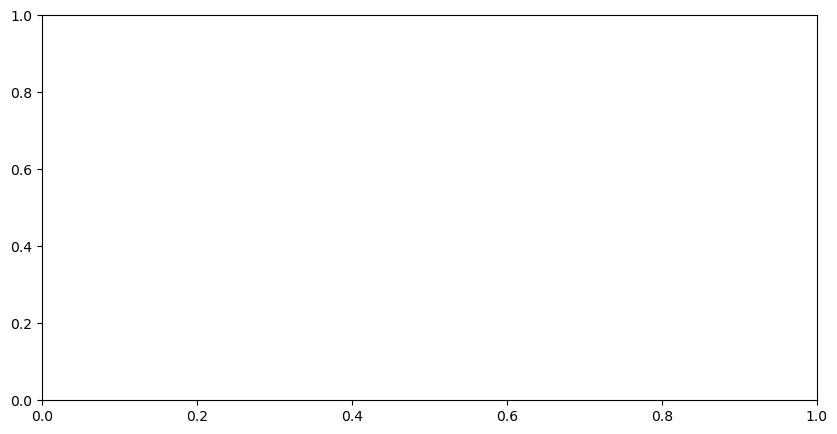

In [ ]:
bins_ = [0.1, 0.2, 1,2, 5, 10,20,40]
animals_list = ED7_data_dict['nrem_master']['animals']

nrem_f_warp_factors, nrem_r_warp_factors, nrem_forward_total, nrem_reverse_total = extract_mean_warps(pd.DataFrame(ED7_data_dict['nrem_master']['regression']), bins_,animals_list)
nrem_proportion_forward_v_reverse = np.array(nrem_forward_total)/np.array(nrem_reverse_total)
rem_f_warp_factors, rem_r_warp_factors, rem_forward_total, rem_reverse_total = extract_mean_warps(pd.DataFrame(ED7_data_dict['rem_master']['regression']), bins_,animals_list)
rem_proportion_forward_v_reverse = np.array(rem_forward_total)/np.array(rem_reverse_total)

############################################################### PLOT 

fig,ax = plt.subplots(1, 1,figsize=(10, 5))
color_ = '#69BD45'
plot_warp_factors(ax, nrem_f_warp_factors, nrem_r_warp_factors, bins_, color_)
color_ = '#32495C'
plot_warp_factors(ax, rem_f_warp_factors, rem_r_warp_factors, bins_, color_)
ax.set_title('nrem vs rem')
plt.show()

## STATS

print(scipy.stats.shapiro([item for sublist in nrem_f_warp_factors for item in sublist]))
print(scipy.stats.shapiro([item for sublist in nrem_r_warp_factors for item in sublist]))
print(scipy.stats.shapiro([item for sublist in rem_f_warp_factors for item in sublist]))
print(scipy.stats.shapiro([item for sublist in rem_r_warp_factors for item in sublist]))
print('----------------------------')
print('permanova - forward reverse')
print('----------------------------')
permanova_forward_vs_reverse(nrem_f_warp_factors, nrem_r_warp_factors)
print('-------------------')
permanova_forward_vs_reverse(rem_f_warp_factors, rem_r_warp_factors)
print('----------------------------')
print('permanova - group differences')
print('----------------------------')
# PERMANOVA late vs early diff
el_grouping = group_difference_permanova(nrem_f_warp_factors, nrem_f_warp_factors, rem_f_warp_factors, rem_f_warp_factors)
print('----------------------------')
print('posthoc - group differences')
print('----------------------------')
# Combine:
combined_data = np.vstack([
    np.asarray(nrem_f_warp_factors),
    np.asarray(nrem_r_warp_factors),
    np.asarray(rem_f_warp_factors),
    np.asarray(rem_r_warp_factors)
])
combined_labels = np.array(el_grouping)
feature_results = pairwise_permanova_by_feature(
    combined_data,
    combined_labels,
    method='bonferroni',
    permutations=10000
)
print("Significant feature-wise pairwise PERMANOVA results (α=0.05):")
for res in feature_results:
    p = res["p_value"]
    if p < 0.05:
        stars = '***' if p < 0.001 else '**' if p < 0.01 else '*'
        print(f"Feature {res['feature']}: {res['group1']} vs {res['group2']}")
        print(f"  statistic = {res['test_stat']:.4f}, p (corr.) = {p:.4g} {stars}")
        print(f"R2 = {res['R2']}")
        print("---")


#### PLOT inset
fig, ax = plt.subplots(figsize=(2, 4))
ax.plot(np.zeros(len(nrem_proportion_forward_v_reverse)),nrem_proportion_forward_v_reverse,'o', color = '#69BD45')
ax.boxplot([x for x in nrem_proportion_forward_v_reverse if not np.isnan(x)], positions=[0.3], widths=0.1, patch_artist=True, boxprops=dict(facecolor='#69BD45', color='#69BD45'), medianprops=dict(color='#EE7832'))
ax.plot(np.ones(len(rem_proportion_forward_v_reverse)),rem_proportion_forward_v_reverse,'o', color = '#32495C')
ax.boxplot([x for x in rem_proportion_forward_v_reverse if not np.isnan(x)], positions=[0.7], widths=0.1, patch_artist=True, boxprops=dict(facecolor='#32495C', color='#32495C'), medianprops=dict(color='#EE7832'))
ax.set_title('nrem vs rem')
plt.show()

### STATS for inset
print('Inset: Difference from expected ------------------------')
# Perform one-sample t-test
statistic, p_value = ttest_1samp(nrem_proportion_forward_v_reverse, 1.0)
# Print the test statistic and p-value
print("Test statistic:", statistic)
print("P-value:", p_value)
print(effect_size(x=nrem_proportion_forward_v_reverse,test='one_sample_ttest',popmean = 1))

print('--------------------')
# Perform one-sample t-test
statistic, p_value = ttest_1samp(rem_proportion_forward_v_reverse, 1.0, nan_policy="omit")
# Print the test statistic and p-value
print("Test statistic:", statistic)
print("P-value:", p_value)
rem_proportion_forward_v_reverse_nanr = rem_proportion_forward_v_reverse[~np.isnan(rem_proportion_forward_v_reverse)]
print(effect_size(x=rem_proportion_forward_v_reverse_nanr,test='one_sample_ttest',popmean = 1))

print('----------------------')
print('Inset: comparison forward/reverse ------------------------')
print(scipy.stats.shapiro(nrem_proportion_forward_v_reverse))
print(scipy.stats.shapiro(rem_proportion_forward_v_reverse))
# not all normal so use wilcoxn signed rank
print(scipy.stats.wilcoxon(nrem_proportion_forward_v_reverse, rem_proportion_forward_v_reverse,nan_policy='omit'))
print(effect_size(x=nrem_proportion_forward_v_reverse, y=rem_proportion_forward_v_reverse, test='wilcoxon'))

# figure E

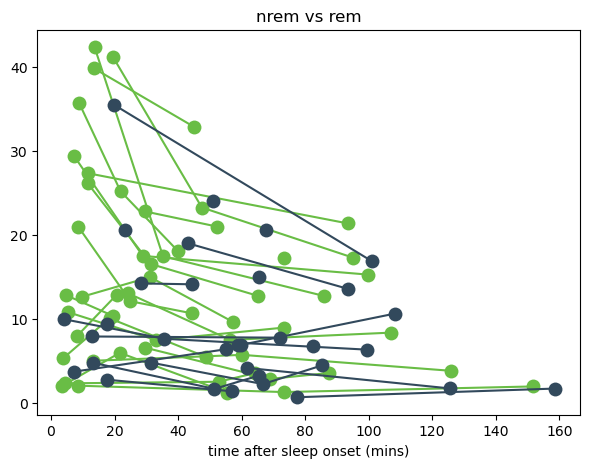

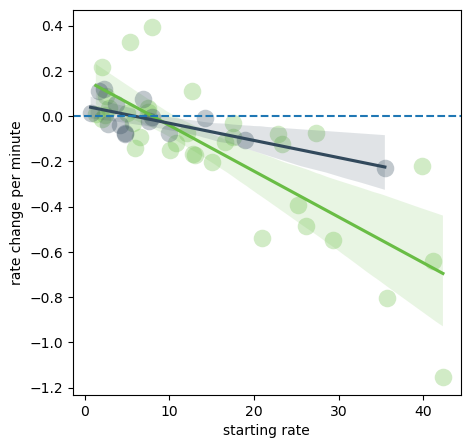

-----------------------------------------
PLOT 2:
Group 1 (NREM):
model p value (f statistic) = 
1.4965340287553032e-08
r2 = 
0.6265778507275581
Group 2 (REM):
model p value (f statistic) = 
0.0012629766463973892
r2 = 
0.5634039965422037
                 Multivariate linear model
                                                            
------------------------------------------------------------
       Intercept        Value  Num DF  Den DF F Value Pr > F
------------------------------------------------------------
          Wilks' lambda 0.3602 2.0000 47.0000 41.7334 0.0000
         Pillai's trace 0.6398 2.0000 47.0000 41.7334 0.0000
 Hotelling-Lawley trace 1.7759 2.0000 47.0000 41.7334 0.0000
    Roy's greatest root 1.7759 2.0000 47.0000 41.7334 0.0000
------------------------------------------------------------
                                                            
------------------------------------------------------------
         groups         Value  Num DF  Den DF F 

In [ ]:

group1_data, group2_data = plot_decay(ED7_data_dict['nrem_master']['binned_rate']  ,ED7_data_dict['nrem_master']['bins_relative_so'],ED7_data_dict['rem_master']['binned_rate']  ,ED7_data_dict['rem_master']['bins_relative_so'], '#69BD45','#32495C','nrem vs rem')
plt.show()


print('-----------------------------------------')
###################### STATS for inset
###################### STATS
df1 = pd.DataFrame(group1_data)
df2 = pd.DataFrame(group2_data)
# Fit linear regression for Group 1
model_group1 = sm.OLS.from_formula('y ~ x', data=df1).fit()
model_group2 = sm.OLS.from_formula('y ~ x', data=df2).fit()
print('PLOT 2:')
# Print the summary of each model
print("Group 1 (NREM):")
# print(model_group1.summary())
print('model p value (f statistic) = ')
print(model_group1.f_pvalue)
print('r2 = ')
print(model_group1.rsquared)
print("Group 2 (REM):")
# print(model_group1.summary())
print('model p value (f statistic) = ')
print(model_group2.f_pvalue)
print('r2 = ')
print(model_group2.rsquared)

## STATS 
# Combine the data into one DataFrame
data = pd.concat([df1, df2], axis=0)
# Create a grouping variable
groups = np.array(['nrem'] * len(df1) + ['rem'] * len(df2))
# Perform MANOVA
manova = MANOVA.from_formula('x + y ~ groups', data=data)
# Print the MANOVA results
print(manova.mv_test())
# Compute partial eta-squared
eta_squared = compute_partial_eta_squared(manova.mv_test())
print("Partial eta-squared for each effect:", eta_squared)

# figure F

c:\miniconda\envs\proc_replay_2025\lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\miniconda\envs\proc_replay_2025\lib\site-packages\numpy\_core\_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\miniconda\envs\proc_replay_2025\lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\miniconda\envs\proc_replay_2025\lib\site-packages\numpy\_core\_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


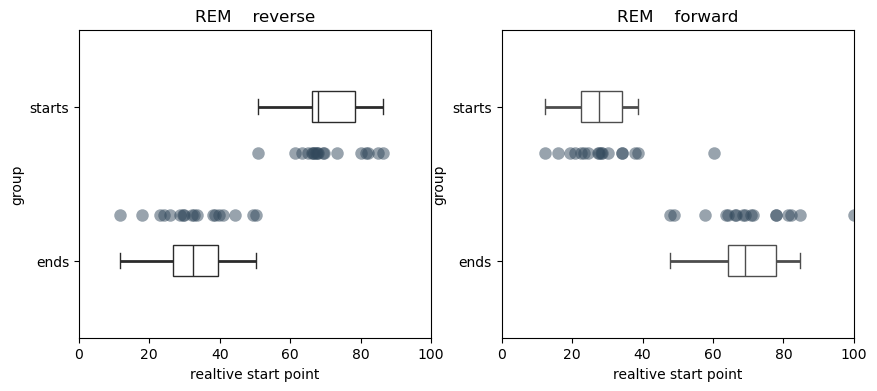

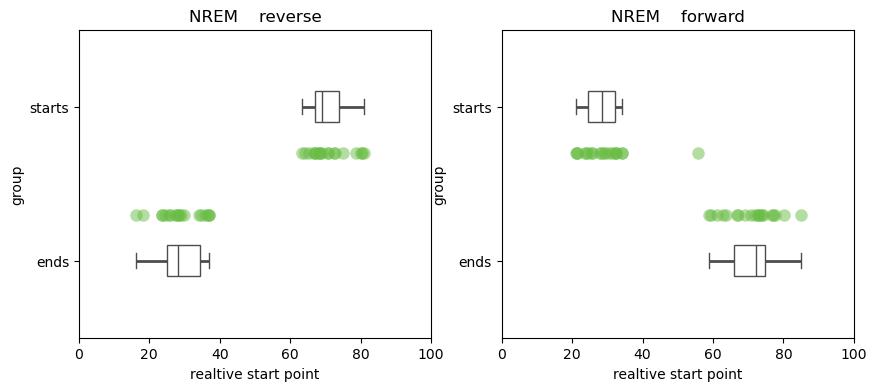

ShapiroResult(statistic=np.float64(0.9061204963700601), pvalue=np.float64(0.06285938732751824))
ShapiroResult(statistic=np.float64(0.7736133615165437), pvalue=np.float64(0.0003582852080769677))
ShapiroResult(statistic=np.float64(0.9404969955492942), pvalue=np.float64(0.2691817853001265))
ShapiroResult(statistic=np.float64(0.9707792654946212), pvalue=np.float64(0.7712439799067917))
ShapiroResult(statistic=np.float64(0.9231248273603834), pvalue=np.float64(0.14683922611035938))
ShapiroResult(statistic=np.float64(0.9009760664365007), pvalue=np.float64(0.07052671673829441))
ShapiroResult(statistic=np.float64(0.9834605233155895), pvalue=np.float64(0.9785789173811841))
ShapiroResult(statistic=np.float64(0.9683742245572373), pvalue=np.float64(0.7893636282368055))
_____________________________________________________________________________________________
method name               PERMANOVA
test statistic name        pseudo-F
sample size                      34
number of groups                

c:\miniconda\envs\proc_replay_2025\lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\miniconda\envs\proc_replay_2025\lib\site-packages\numpy\_core\_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\miniconda\envs\proc_replay_2025\lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\miniconda\envs\proc_replay_2025\lib\site-packages\numpy\_core\_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [ ]:

fig,[ax,ax2] = plt.subplots(1, 2,figsize=(10, 4))
all_chunk_reverse_start_mean, all_chunk_forward_start_mean, all_chunk_reverse_end_mean, all_chunk_forward_end_mean = extract_start_end_points(pd.DataFrame(ED7_data_dict['rem_master']['start_end']))
plot_start_end_times(all_chunk_reverse_start_mean,all_chunk_forward_start_mean,all_chunk_reverse_end_mean,all_chunk_forward_end_mean,ax,ax2,'REM','#32495C')

fig,[ax,ax2] = plt.subplots(1, 2,figsize=(10, 4)) 
all_chunk_reverse_start_mean, all_chunk_forward_start_mean, all_chunk_reverse_end_mean, all_chunk_forward_end_mean = extract_start_end_points(pd.DataFrame(ED7_data_dict['nrem_master']['start_end']))
plot_start_end_times(all_chunk_reverse_start_mean,all_chunk_forward_start_mean,all_chunk_reverse_end_mean,all_chunk_forward_end_mean,ax,ax2,'NREM','#69BD45')

plt.show()
#### STATS

nrem_all_chunk_reverse_start_mean, nrem_all_chunk_forward_start_mean, nrem_all_chunk_reverse_end_mean, nrem_all_chunk_forward_end_mean = extract_start_end_points(pd.DataFrame(ED7_data_dict['nrem_master']['start_end']))
rem_all_chunk_reverse_start_mean, rem_all_chunk_forward_start_mean, rem_all_chunk_reverse_end_mean, rem_all_chunk_forward_end_mean = extract_start_end_points(pd.DataFrame(ED7_data_dict['rem_master']['start_end']))

group1 = [x for x in nrem_all_chunk_reverse_start_mean if not np.isnan(x)] 
group2 = [x for x in nrem_all_chunk_forward_start_mean if not np.isnan(x)] 
group3 = [x for x in nrem_all_chunk_reverse_end_mean if not np.isnan(x)] 
group4 = [x for x in nrem_all_chunk_forward_end_mean if not np.isnan(x)] 
group5 = [x for x in rem_all_chunk_reverse_start_mean if not np.isnan(x)] 
group6 = [x for x in rem_all_chunk_forward_start_mean if not np.isnan(x)] 
group7 = [x for x in rem_all_chunk_reverse_end_mean if not np.isnan(x)] 
group8 = [x for x in rem_all_chunk_forward_end_mean if not np.isnan(x)] 

for group in [group1, group2, group3, group4, group5, group6, group7, group8]:
    print(scipy.stats.shapiro(group))
    
df_nrem = pd.DataFrame({
    'group':       ['late'] * len(nrem_all_chunk_forward_start_mean),
    'forward_start': nrem_all_chunk_forward_start_mean,
    'forward_end':   nrem_all_chunk_forward_end_mean,
    'reverse_start': nrem_all_chunk_reverse_start_mean,
    'reverse_end':   nrem_all_chunk_reverse_end_mean,
})
df_rem = pd.DataFrame({
    'group':       ['early'] * len(rem_all_chunk_forward_start_mean),
    'forward_start': rem_all_chunk_forward_start_mean,
    'forward_end':   rem_all_chunk_forward_end_mean,
    'reverse_start': rem_all_chunk_reverse_start_mean,
    'reverse_end':   rem_all_chunk_reverse_end_mean,
})

print('_____________________________________________________________________________________________')
# 1. Concatenate and clean
df = pd.concat([df_nrem, df_rem], ignore_index=True)
df_clean = df.dropna(subset=['forward_start','forward_end','reverse_start','reverse_end']).reset_index(drop=True)
# 2. Build your feature matrix
X = df_clean[['forward_start','forward_end','reverse_start','reverse_end']].values
# 3. Compute Euclidean distances
dist_array = squareform(pdist(X, metric='euclidean'))
# 4. Create DistanceMatrix with simple integer-string IDs (0,1,2,…)
ids = [str(i) for i in range(len(df_clean))]
dm = DistanceMatrix(dist_array, ids=ids)
# 5. Extract grouping as a plain list (length N)
grouping = df_clean['group'].tolist()
# 6. Run PERMANOVA
result = permanova(distance_matrix=dm,
                   grouping=grouping,
                   permutations=999)
print(result)
#Compute R² manually (effect size)
# ss_total = sum of squared distances / n
D = dm.data        # <-- this is the fix
n = len(grouping)
ss_total = np.sum(D**2) / n
# ss_between: sum of squared group means
group_labels = np.array(grouping)
unique_groups = np.unique(group_labels)
ss_between = 0
for g in unique_groups:
    idx = np.where(group_labels == g)[0]
    Di = D[np.ix_(idx, idx)]
    ss_between += len(idx) * (Di.mean() ** 2)
r2 = ss_between / ss_total
print(f"PERMANOVA effect size R²: {r2:.5f}")




# figure G

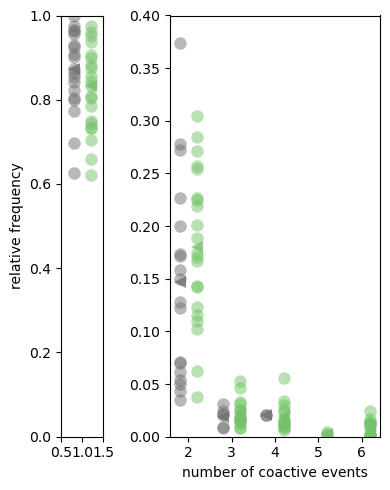

method name               PERMANOVA
test statistic name        pseudo-F
sample size                      40
number of groups                  2
test statistic             2.226019
p-value                    0.125287
number of permutations        10000
Name: PERMANOVA results, dtype: object
PERMANOVA effect size R²: 0.66602


In [8]:
rem_counts = collapse(convert_word_keys_to_numeric(ED7_data_dict['rem_master']['coactive_freqs']))
nrem_counts = collapse(convert_word_keys_to_numeric(ED7_data_dict['nrem_master']['coactive_freqs']))

colors = {"nrem": "#727272", "rem": "#74C269"}
offset = 0.2


# PLOT
# ============================================================
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(4, 5),
    gridspec_kw={'width_ratios': [2, 10]}
)

# Left panel: coactive = 1 (median)
for counts, color, off in [
    (rem_counts, colors["rem"], offset),
    (nrem_counts, colors["nrem"], -offset)
]:
    plot_group(ax1, counts, ['1'], off, color, np.median)

ax1.set_xlim(0.5, 1.5)
ax1.set_ylim(0, 1)
ax1.set_ylabel('relative frequency')


# Right panel: coactive >= 2 (mean)
keys = [str(i) for i in range(2, 7)]

for counts, color, off in [
    (rem_counts, colors["rem"], offset),
    (nrem_counts, colors["nrem"], -offset)
]:
    plot_group(ax2, counts, keys, off, color, np.mean)

ax2.set_xlabel('number of coactive events')
ax2.set_ylim(0, 0.4)

plt.tight_layout()
plt.show()


# ============================================================
# STATS
# ============================================================
permanova_coactive_freqs(convert_word_keys_to_numeric(ED7_data_dict['nrem_master']['coactive_freqs']), convert_word_keys_to_numeric(ED7_data_dict['rem_master']['coactive_freqs']))



# figure H

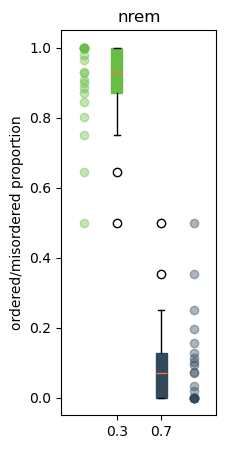

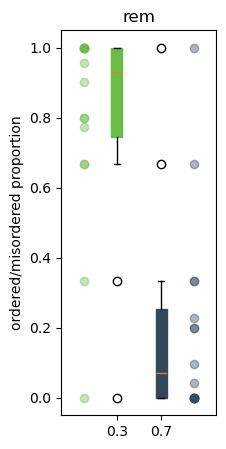

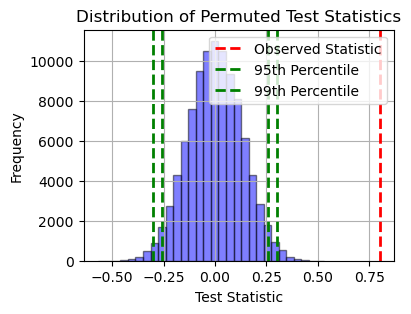

- p-value: 0.0
- 99th percentile of permuted statistics: 0.3039997563203067
- Observed Test Statistic: 0.8007120280365966
cohens d = 6.0230270340035545
------------------


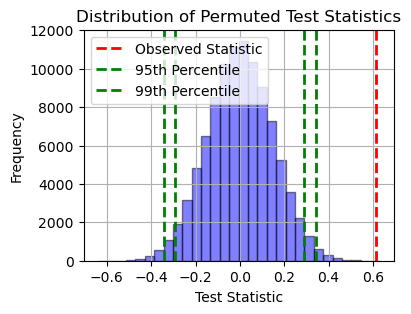

- p-value: 1e-05
- 99th percentile of permuted statistics: 0.3411561264822134
- Observed Test Statistic: 0.6122943378643273
cohens d = 2.1571918623983026
------------------
ShapiroResult(statistic=np.float64(0.7713919009228972), pvalue=np.float64(0.00024736257927586214))
ShapiroResult(statistic=np.float64(0.7713919009228979), pvalue=np.float64(0.00024736257927586756))
ShapiroResult(statistic=np.float64(0.7306490635159663), pvalue=np.float64(0.0003749818509315708))
ShapiroResult(statistic=np.float64(0.7306490635159655), pvalue=np.float64(0.0003749818509315636))
------------------
method name               PERMANOVA
test statistic name        pseudo-F
sample size                      37
number of groups                  2
test statistic             1.806033
p-value                       0.211
number of permutations          999
Name: PERMANOVA results, dtype: object
PERMANOVA effect size R²: 0.43973


In [9]:
# PLOT
plot_ordered_misrodered(ED7_data_dict['nrem_master']['ordered_misordered'],'nrem','ordered/misordered proportion')
plot_ordered_misrodered(ED7_data_dict['rem_master']['ordered_misordered'],'rem','ordered/misordered proportion')

# STATS
list1 = [float(item[0]) for item in ED7_data_dict['nrem_master']['ordered_misordered']] 
list2 = [float(item[1]) for item in ED7_data_dict['nrem_master']['ordered_misordered']] 
list1= [x for x in list1 if not np.isnan(x)] 
list2= [x for x in list2 if not np.isnan(x)] 
permutation_test(list1, list2)
print(f'cohens d = {cohens_d(list1, list2)}')

print('------------------')
list3 = [float(item[0]) for item in ED7_data_dict['rem_master']['ordered_misordered']] 
list4 = [float(item[1]) for item in ED7_data_dict['rem_master']['ordered_misordered']] 
list3= [x for x in list3 if not np.isnan(x)] 
list4= [x for x in list4 if not np.isnan(x)] 
permutation_test(list3, list4)
print(f'cohens d = {cohens_d(list3, list4)}')

# test for normality
print('------------------')
print(scipy.stats.shapiro(list1))
print(scipy.stats.shapiro(list2))
print(scipy.stats.shapiro(list3))
print(scipy.stats.shapiro(list4))
print('------------------')
# parmanova between groups
permanova_ordered_misordered(ED7_data_dict['nrem_master']['ordered_misordered'], ED7_data_dict['rem_master']['ordered_misordered'])


# figure I

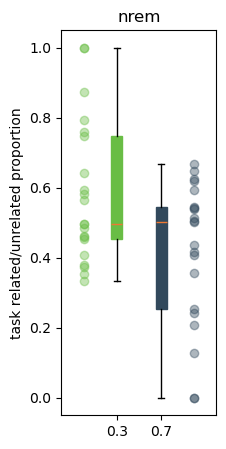

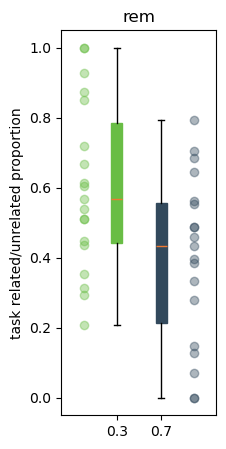

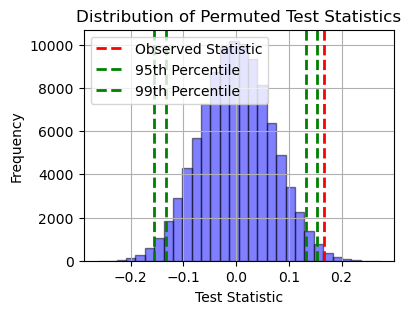

- p-value: 0.00524
- 99th percentile of permuted statistics: 0.15425150349856226
- Observed Test Statistic: 0.16722336566713547
cohens d = 0.8160469825472902
------------------


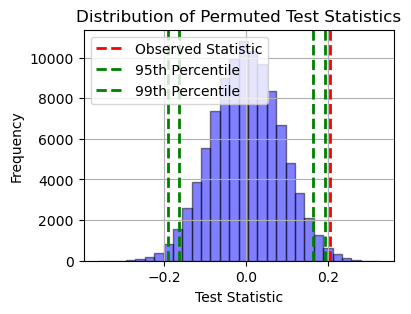

- p-value: 0.0068
- 99th percentile of permuted statistics: 0.19285541219009472
- Observed Test Statistic: 0.2044287749530917
cohens d = 0.8486081323892961
ShapiroResult(statistic=np.float64(0.9030756783902324), pvalue=np.float64(0.04015863072358345))
ShapiroResult(statistic=np.float64(0.9030756783902321), pvalue=np.float64(0.04015863072358291))
ShapiroResult(statistic=np.float64(0.9546064023612558), pvalue=np.float64(0.4714455919954149))
ShapiroResult(statistic=np.float64(0.9546064023612558), pvalue=np.float64(0.4714455919954149))
method name               PERMANOVA
test statistic name        pseudo-F
sample size                      38
number of groups                  2
test statistic                 -0.0
p-value                         1.0
number of permutations          999
Name: PERMANOVA results, dtype: object
PERMANOVA effect size R²: 0.64799


In [11]:
plot_ordered_misrodered(ED7_data_dict['nrem_master']['task_nontask'],'nrem','task related/unrelated proportion')
plot_ordered_misrodered(ED7_data_dict['rem_master']['task_nontask'],'rem','task related/unrelated proportion')

# STATS
list1 = [float(item[0]) for item in ED7_data_dict['nrem_master']['task_nontask']] 
list2 = [float(item[1]) for item in ED7_data_dict['nrem_master']['task_nontask']] 
list1= [x for x in list1 if not np.isnan(x)] 
list2= [x for x in list2 if not np.isnan(x)] 
permutation_test(list1, list2)
print(f'cohens d = {cohens_d(list1, list2)}')

print('------------------')
list3 = [float(item[0]) for item in ED7_data_dict['rem_master']['task_nontask']] 
list4 = [float(item[1]) for item in ED7_data_dict['rem_master']['task_nontask']] 
list3= [x for x in list3 if not np.isnan(x)] 
list4= [x for x in list4 if not np.isnan(x)] 
permutation_test(list3, list4)
print(f'cohens d = {cohens_d(list3, list4)}')

# test for normality
print(scipy.stats.shapiro(list1))
print(scipy.stats.shapiro(list2))
print(scipy.stats.shapiro(list3))
print(scipy.stats.shapiro(list4))

#permanova for nrem vs rem
permanova_ordered_misordered(ED7_data_dict['rem_master']['task_nontask'], ED7_data_dict['rem_master']['task_nontask'])


# figure J

Fitted parameters: a = 0.03134361840164427, b = 3.2803097177615754
R-squared: 0.9953248403056675
p-values: [np.float64(3.7866195450320106e-06), np.float64(1.90887083917346e-09)]
Fitted parameters: a = 0.030106323906768415, b = 3.3211509550691662
R-squared: 0.9934043331802855
p-values: [np.float64(1.557158934106795e-05), np.float64(7.638629506701022e-09)]
                 Multivariate linear model
                                                            
------------------------------------------------------------
       Intercept        Value  Num DF  Den DF F Value Pr > F
------------------------------------------------------------
          Wilks' lambda 0.3579 2.0000 17.0000 15.2484 0.0002
         Pillai's trace 0.6421 2.0000 17.0000 15.2484 0.0002
 Hotelling-Lawley trace 1.7939 2.0000 17.0000 15.2484 0.0002
    Roy's greatest root 1.7939 2.0000 17.0000 15.2484 0.0002
------------------------------------------------------------
                                                   

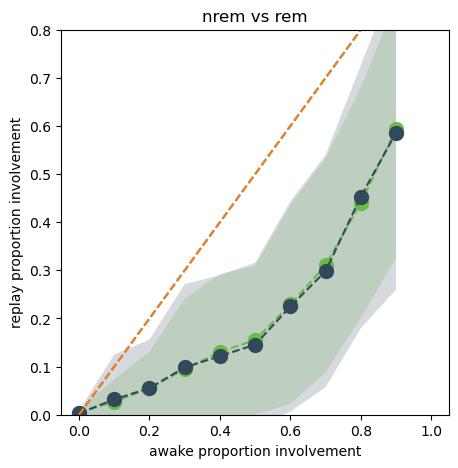

In [12]:
awake_seqbyseq_neuron_involvements = ED7_data_dict['neuron_involvement_master']['awake_seqbyseq_neuron_involvements']

fig, ax = plt.subplots(1, 1,figsize=(5, 5))
nrem_awake_sleep_relationship = return_binned_neuron_awake_sleep_rel(awake_seqbyseq_neuron_involvements,ED7_data_dict['nrem_master']['sleep_seqbyseq_neuron_involvements'])
plot_awake_sleep_relationship(nrem_awake_sleep_relationship,'#69BD45',ax)
rem_awake_sleep_relationship = return_binned_neuron_awake_sleep_rel(awake_seqbyseq_neuron_involvements,ED7_data_dict['rem_master']['sleep_seqbyseq_neuron_involvements'])
plot_awake_sleep_relationship(rem_awake_sleep_relationship,'#32495C',ax)
ax.set_title('nrem vs rem')

## STATS
m =manova_groups_neuron_involvement(nrem_awake_sleep_relationship,rem_awake_sleep_relationship)
eta_squared = compute_partial_eta_squared(m)
print("Partial eta-squared for each effect:", eta_squared)


